In [37]:
import pandas as pd #untuk memuat kumpulan data ke dalam DataFrame
import seaborn as sns #untuk visualisasi data dan untuk melakukan analisis data eksplorasi (EDA)
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split #untuk membagi kumpulan data menjadi subset pelatihan dan pengujian
from sklearn.tree import DecisionTreeClassifier #machine learning algorithms yang akan digunakan untuk klasifikasi
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score #metrik untuk mengevaluasi kinerja model
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [62]:
# untuk load kumpulan data dari URL web menggunakan pd.read_csv(). Ini akan membaca kumpulan data ke dalam pandas DataFrame
url = "https://raw.githubusercontent.com/chellee18/DataMining/refs/heads/main/week%206/diabetes.csv"
df.sample(10) #Menunjukan 10 data acak


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
321,3,112,74,30,0,31.6,0.197,25,1
105,1,126,56,29,152,28.7,0.801,21,0
228,4,197,70,39,744,36.7,2.329,31,0
602,1,124,74,36,0,27.8,0.100,30,0
209,7,184,84,33,0,35.5,0.355,41,1
337,5,115,76,0,0,31.2,0.343,44,1
11,10,168,74,0,0,38.0,0.537,34,1
185,7,194,68,28,0,35.9,0.745,41,1
267,2,128,64,42,0,40.0,1.101,24,0
384,1,125,70,24,110,24.3,0.221,25,0


In [63]:
#untuk melihat gambaran umum dari dataset yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [64]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


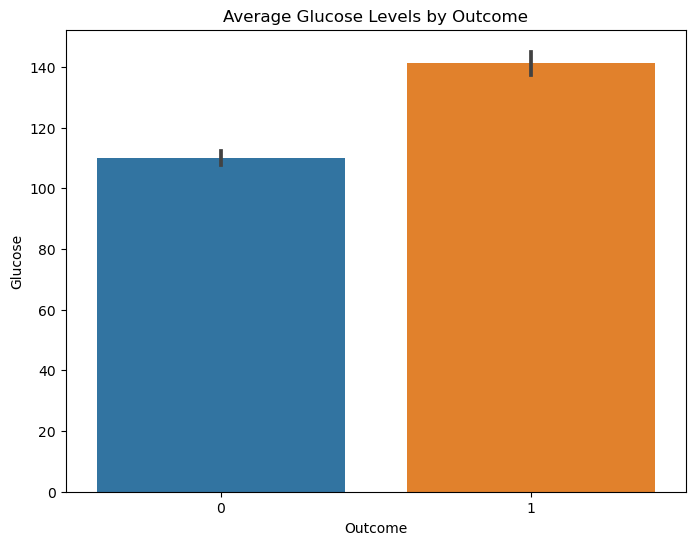

In [10]:
# Bar plot of average Glucose levels grouped by Outcome
#Plot ini membantu dalam EDA, terutama untuk melihat bagaimana distribusi kadar gula darah terkait dengan kemungkinan 
#seseorang menderita diabetes

plt.figure(figsize=(8,6))
sns.barplot(x='Outcome', y='Glucose', data=df)
plt.title('Average Glucose Levels by Outcome')
plt.show()


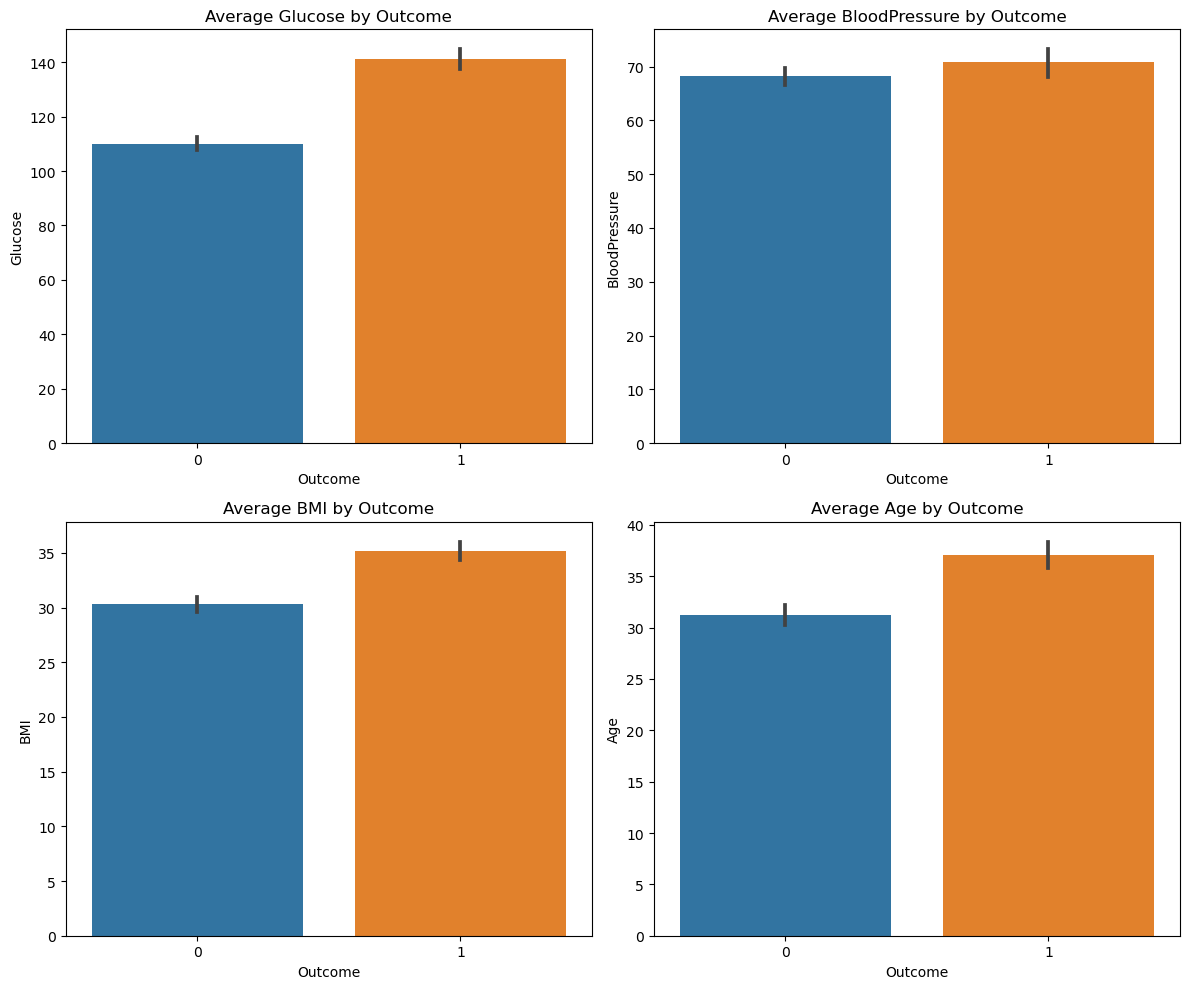

In [22]:
#membandingkan rata-rata nilai dari beberapa fitur (Glucose, BloodPressure, BMI, dan Age) 
#berdasarkan Outcome (diabetes atau tidak)

# Creating a list of features for comparison
features = ['Glucose', 'BloodPressure', 'BMI', 'Age']

plt.figure(figsize=(12, 10))

# Loop through the features and create a subplot for each
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of plots
    sns.barplot(x='Outcome', y=feature, data=df)
    plt.title(f'Average {feature} by Outcome')

plt.tight_layout()
plt.show()


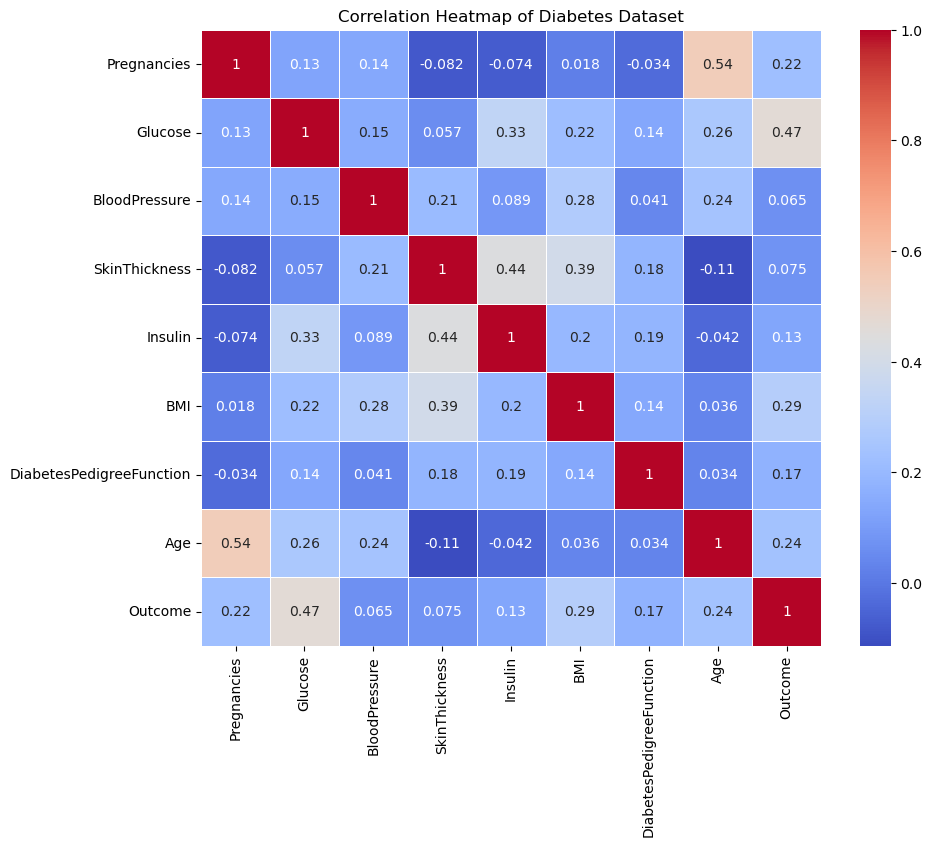

In [27]:
# Menghitung korelasi
corr_matrix = df.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Menambahkan judul
plt.title('Correlation Heatmap of Diabetes Dataset')
plt.show()

#Glucose dan Outcome memiliki korelasi kuat (0.47), artinya kadar glukosa yang tinggi meningkatkan risiko diabetes.
#Age dan Pregnancies berkorelasi positif (0.54), menunjukkan usia yang lebih tua terkait dengan lebih banyak kehamilan.
#BMI berhubungan moderat dengan Outcome (0.29), mengindikasikan BMI tinggi meningkatkan kemungkinan diabetes.
#Korelasi antara BloodPressure (0.065) dan Outcome serta Insulin (0.13) dengan Outcome relatif rendah, menunjukkan hubungan yang lemah.
#Heatmap memperlihatkan warna merah untuk korelasi positif yang kuat dan biru untuk korelasi negatif atau tidak ada korelasi.

In [28]:
#memisahkan dataset menjadi fitur (input) dan label (output), lalu membagi data menjadi data latih dan data uji

X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
X_train.shape, X_test.shape # untuk menunjukkan jumlah baris dan kolom

((614, 8), (154, 8))

**Criterion Entropy**

In [30]:
#a
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [31]:
#b
y_pred_en = clf_en.predict(X_test) 
#untuk mendapatkan hasil prediksi tentang outcome penguin dari data pengujian

In [34]:
#c
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en))) #print hasil akurasi

Model accuracy score with criterion entropy: 0.7662


In [35]:
#d
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7752
Test set score: 0.7662


[Text(0.5, 0.875, 'x[1] <= 127.5\nentropy = 0.931\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'x[7] <= 28.5\nentropy = 0.712\nsamples = 390\nvalue = [314, 76]'),
 Text(0.125, 0.375, 'x[5] <= 30.95\nentropy = 0.391\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0625, 0.125, 'entropy = 0.068\nsamples = 124\nvalue = [123, 1]'),
 Text(0.1875, 0.125, 'entropy = 0.646\nsamples = 97\nvalue = [81, 16]'),
 Text(0.375, 0.375, 'x[5] <= 26.35\nentropy = 0.933\nsamples = 169\nvalue = [110, 59]'),
 Text(0.3125, 0.125, 'entropy = 0.191\nsamples = 34\nvalue = [33, 1]'),
 Text(0.4375, 0.125, 'entropy = 0.986\nsamples = 135\nvalue = [77, 58]'),
 Text(0.75, 0.625, 'x[5] <= 29.95\nentropy = 0.964\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.375, 'x[1] <= 145.5\nentropy = 0.895\nsamples = 61\nvalue = [42, 19]'),
 Text(0.5625, 0.125, 'entropy = 0.533\nsamples = 33\nvalue = [29, 4]'),
 Text(0.6875, 0.125, 'entropy = 0.996\nsamples = 28\nvalue = [13, 15]'),
 Text(0.875, 0.375, 'x[1] <= 165.5

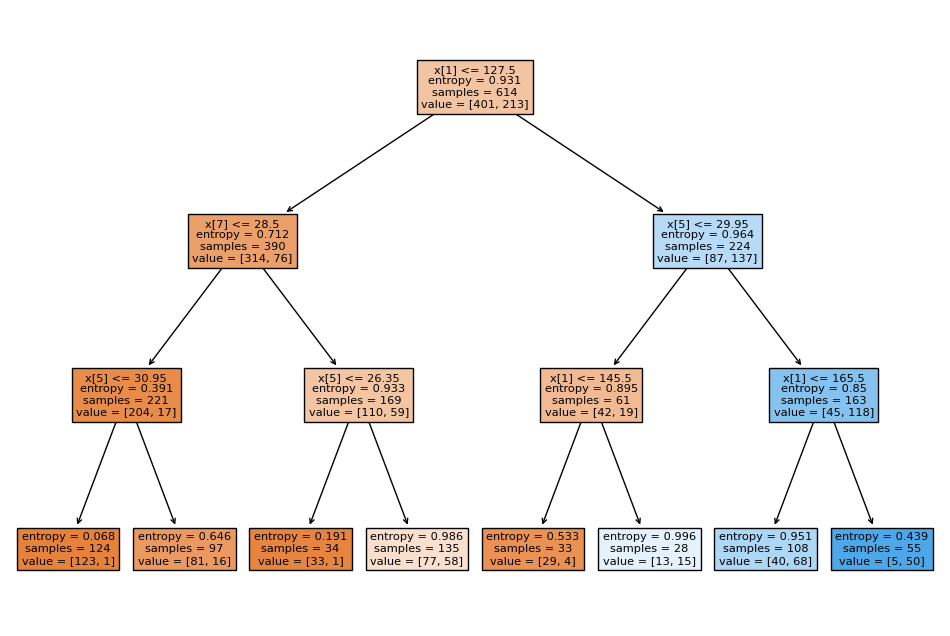

In [38]:
#e
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train), filled=True) #Membuat tree yang ada warnanya

In [46]:
#f
#Untuk membuat confusion matrix
cm = confusion_matrix(y_test, y_pred_en) #Untuk membuat confusion matrix
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[83 16]
 [20 35]]


In [50]:
#g
##untuk membuat dan print classificaton report
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



**GINI**

In [40]:
#GINI
#a

# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [41]:
#b
y_pred_gini = clf_gini.predict(X_test)  #untuk mendapatkan hasil prediksi tentang spesies penguin dari data pengujian menggunakan gini

In [42]:
#c
print('Model accuracy score with criterion gini: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini))) #Untuk print hasil akurasi

Model accuracy score with criterion gini: 0.7597


In [43]:
#d
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7769
Test set score: 0.7597


[Text(0.5, 0.875, 'x[1] <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'x[7] <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]'),
 Text(0.125, 0.375, 'x[5] <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0625, 0.125, 'gini = 0.016\nsamples = 124\nvalue = [123, 1]'),
 Text(0.1875, 0.125, 'gini = 0.275\nsamples = 97\nvalue = [81, 16]'),
 Text(0.375, 0.375, 'x[5] <= 26.35\ngini = 0.454\nsamples = 169\nvalue = [110, 59]'),
 Text(0.3125, 0.125, 'gini = 0.057\nsamples = 34\nvalue = [33, 1]'),
 Text(0.4375, 0.125, 'gini = 0.49\nsamples = 135\nvalue = [77, 58]'),
 Text(0.75, 0.625, 'x[5] <= 29.95\ngini = 0.475\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.375, 'x[1] <= 146.5\ngini = 0.429\nsamples = 61\nvalue = [42, 19]'),
 Text(0.5625, 0.125, 'gini = 0.239\nsamples = 36\nvalue = [31, 5]'),
 Text(0.6875, 0.125, 'gini = 0.493\nsamples = 25\nvalue = [11, 14]'),
 Text(0.875, 0.375, 'x[1] <= 165.5\ngini = 0.4\nsamples = 163\nvalue = 

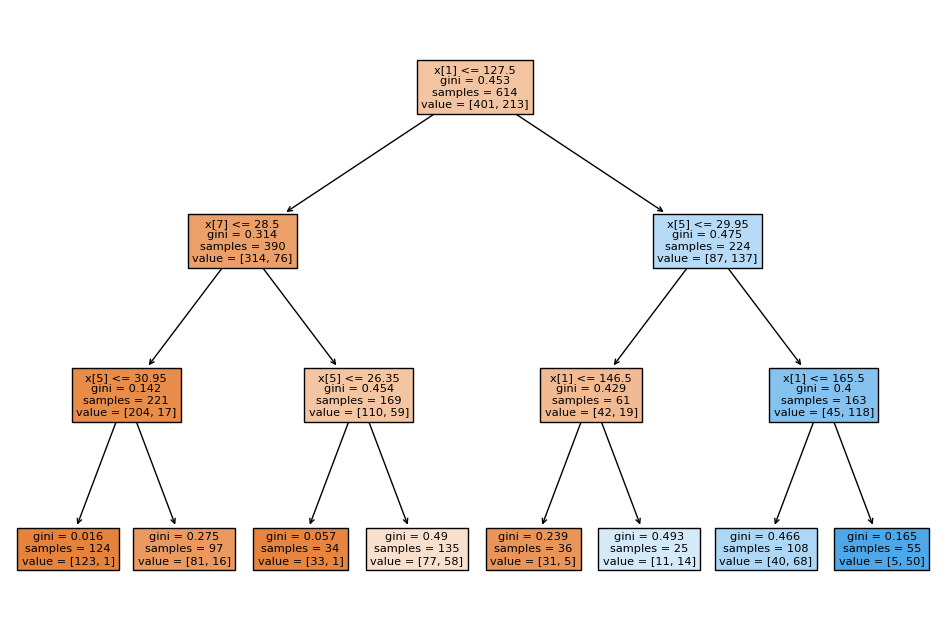

In [44]:
#e
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train), filled=True) #membuat dan menujukan tree

In [47]:
#f
#Untuk membuat confusion matrix

cm = confusion_matrix(y_test, y_pred_gini)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[83 16]
 [21 34]]


In [48]:
#g
#untuk membuat dan print classificaton report
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



**Naive Bayes**

In [52]:
#a
nb_classifier = GaussianNB() # untuk menginstansiasi objek Gaussian Naive Bayes dari pustaka scikit-learn.
nb_classifier.fit(X_train, y_train) # untuk melatih model Naive Bayes yang telah dibuat (nb_classifier) dengan data fitur X_train dan label y_train.


GaussianNB()

In [53]:
#b
nb_y_pred = nb_classifier.predict(X_test) # untuk memprediksi label (target) menggunakan model Naive Bayes yang telah dilatih sebelumnya (nb_classifier).

In [54]:
#c
cm = confusion_matrix(y_test, nb_y_pred) #Untuk membuat confussion matrix dari nb
print("Confusion Matrix:\n", cm)

#d
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, nb_y_pred))) #Untuk menujukan hasil akurasi

Confusion Matrix:
 [[79 20]
 [16 39]]
Accuracy Score: 0.7662


In [55]:
#e
print(classification_report(y_test, nb_y_pred)) #Untuk print classification report

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [56]:
#f kesimpulan
#Kedua model menunjukkan hasil yang baik dalam mengklasifikasikan spesies penguin berdasarkan fitur yang ada, 
#baik di set pelatihan maupun set pengujian, dengan akurasi di atas 70%. 
#Namun, model yang menerapkan kriteria entropi menunjukkan tingkat akurasi yang lebih tinggi 
#dibandingkan dengan model yang menggunakan kriteria gini.

**Metode Logistic Regression**

In [57]:
# Metode Logistic regresion
# a
classifier = LogisticRegression(max_iter=200)
classifier.fit(X_train, y_train)  # membuat model logisticc regresion

LogisticRegression(max_iter=200)

In [58]:
# b
y_pred_log = classifier.predict(X_test) # membuat prediksi
comparison_table = pd.DataFrame({"y_test": y_test, "y_pred": y_pred_log})
comparison_table.head() # menampilkan 5 baris pertama dari DataFrame

,y_test,y_pred
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0


In [59]:
#c
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_log))) # print hasil accuracy score

Accuracy Score: 0.7468


In [60]:
# d
cmatrix = confusion_matrix(y_test, y_pred_log)  #untuk membuat matrix
print("Confusion Matrix:\n", cmatrix)

Confusion Matrix:
 [[78 21]
 [18 37]]


In [61]:
# e
print (classification_report (y_test, y_pred_log)) # print hasil classification report

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [ ]:
#f kesimpulan
#Logistic Regression menunjukkan hasil akurasi sebesar 0.7468, yang berada di atas 70%. 
#Dari ketiga model yang dianalisis, model dengan kriteria gini memperoleh akurasi 0.7597, 
#sedangkan model dengan kriteria entropi dan Naive Bayes masing-masing mencatat akurasi 0.7662. 
#Dengan demikian, untuk memprediksi diabetes, urutan rekomendasi model adalah: 1. Entropi, 2. Naive Bayes, 3. Gini, dan 4. Logistic Regression.